<font color="#CC3D3D"><p>
# Creating deep neural networks with various structures

<font color="blue"><p>
아래와 같은 구조를 갖는 DNN을 만들어보자.   
<img align='left' src='http://drive.google.com/uc?export=view&id=1Yx64HH33yGZW5CZmey1wtBwj4KLqn4kA' /><br>

####  전역변수 설정

In [1]:
DNN_VERSION = 3.0  # submission 화일명에 사용
SEED = 0           # random_state 지정

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-22.12.6-py2.py3-none-any.whl (26 kB)


In [3]:
!pip install pydot

In [13]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pydot

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.11.0


In [5]:
# 매번 모델링을 할 때마다 동일한 결과를 얻으려면 아래 코드를 실행해야 함.

def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(SEED)
    random.seed(SEED)
    tf.compat.v1.set_random_seed(SEED)
#    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


#### 데이터 로딩

In [6]:
# 학습 데이터
X_train = pd.read_csv('X_train_preprocessed.csv').drop(columns='ID')
y_train = pd.read_csv('y_train.csv').Salary

# 평가 데이터
X_test = pd.read_csv('X_test_preprocessed.csv')
test_id = X_test.ID
X_test = X_test.drop(columns='ID')

<font color="blue"><p>
#### DNN 모형 생성

<font color="blue"><p>
- 1단계: 모형 정의하기 (입력층/은익층/출력층 쌓기)

In [7]:
inputs = keras.Input(shape=X_train.shape[1], ) 
y = keras.layers.Dense(1, activation='elu')(inputs)
x = keras.layers.BatchNormalization()(inputs)
x = keras.layers.Dense(128, activation='elu')(x)  
x = keras.layers.Dense(64, activation='elu')(x)  
x = keras.layers.Dense(1, activation='linear')(x)  
x = keras.layers.Add()([x,y])  
output = keras.layers.Dense(1, activation='linear')(x)  

model = keras.Model(inputs=inputs, outputs=output)      

In [14]:
# 모형 구조 출력: Total params가 많을수록 복잡한 모델임.
print(model.summary())

# 연결 그래프 시각화: graphviz와 pydot 설치 필요 (graphviz 다운로드하고 설치한 후 pip install pydot)
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True, dpi=70)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 687)]        0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 687)         2748        ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 dense_1 (Dense)                (None, 128)          88064       ['batch_normalization[0][0]']    
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']            

<font color="blue"><p>
- 2단계: 학습방식(손실함수/옵티마이저/평가척도) 설정하기

In [9]:
model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(),         # 옵티마이저 정하기            
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

<font color="blue"><p>
- 3단계: 모형 학습하기 (에포크, 배치사이즈, 조기중단 등 지정) 

In [10]:
hist = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=64, 
    epochs=200, 
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)], #얼리스타핑
    shuffle=False,
    verbose=2,
)

Epoch 1/200
234/234 - 1s - loss: 4064047.0000 - rmse: 2015.9481 - val_loss: 1376680.1250 - val_rmse: 1173.3201 - 1s/epoch - 5ms/step
Epoch 2/200
234/234 - 0s - loss: 864613.7500 - rmse: 929.8461 - val_loss: 1173266.2500 - val_rmse: 1083.1742 - 328ms/epoch - 1ms/step
Epoch 3/200
234/234 - 0s - loss: 787329.2500 - rmse: 887.3157 - val_loss: 1126535.1250 - val_rmse: 1061.3835 - 309ms/epoch - 1ms/step
Epoch 4/200
234/234 - 0s - loss: 755303.3125 - rmse: 869.0819 - val_loss: 1107691.7500 - val_rmse: 1052.4694 - 302ms/epoch - 1ms/step
Epoch 5/200
234/234 - 0s - loss: 738606.6250 - rmse: 859.4222 - val_loss: 1096020.5000 - val_rmse: 1046.9100 - 315ms/epoch - 1ms/step
Epoch 6/200
234/234 - 0s - loss: 728362.5000 - rmse: 853.4416 - val_loss: 1090708.1250 - val_rmse: 1044.3698 - 329ms/epoch - 1ms/step
Epoch 7/200
234/234 - 0s - loss: 721302.1250 - rmse: 849.2951 - val_loss: 1088927.7500 - val_rmse: 1043.5170 - 309ms/epoch - 1ms/step
Epoch 8/200
234/234 - 0s - loss: 716011.5625 - rmse: 846.1747 -

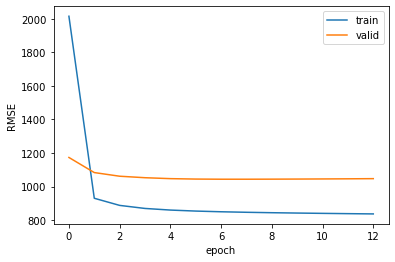

In [11]:
# 러닝커브 그리기: 학습이 잘되었는지 어느정도 판단할 수 있음.

plt.plot(hist.history['rmse'], label="train")
plt.plot(hist.history['val_rmse'], label="valid")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<font color="blue"><p>
- 4단계: 예측하기

In [12]:
# 예측값 얻기: sklearn 과 달리 2차원 array로 출력 => 1차원으로 변경 필요.
pred = model.predict(X_test).flatten()

# submission 화일 생성
filename = f'dnn_{DNN_VERSION}_{hist.history["val_rmse"][-1]:.2f}.csv'
pd.DataFrame({'ID':test_id, 'Salary':pred}).to_csv(filename, index=False)

print(f'{filename} is ready to submit.')

346/346 [==============================] - 0s 633us/step
dnn_3.0_1046.89.csv is ready to submit.


<font color="#CC3D3D"><p>
# End